## Importing All Modules

In [171]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

## Model Training and Analysis

### Getting Data Ready

<h3>Importing the data</h3>

In [172]:
data = pd.read_csv('train.csv')

<h3>Converting date to YYYYMMDD format.</h3><br/> Basically, date is given in string format, I just turned it into the numerical format and stored it inplace

In [173]:
data['Date'] = pd.to_datetime(data['Date'])
data['Date'] = data['Date'].dt.year * 10000 + data['Date'].dt.month * 100 + data['Date'].dt.day
print(data)

      id      Date       Open      Close     Volume Strategy
0      0  20150601  66.208486  75.609978  298506300     Hold
1      1  20150608  64.116235  74.443331  227974800     Hold
2      2  20150615  47.701942  71.140831  250670900      Buy
3      3  20150622  54.754816  72.881344  223614300     Hold
4      4  20150629  48.031899  66.284718  406814900      Buy
..   ...       ...        ...        ...        ...      ...
295  295  20210125  81.284821  83.373498  117281600     Sell
296  296  20210201  71.970249  85.294903  177655800     Sell
297  297  20210208  71.784627  83.266453  146003500     Hold
298  298  20210215  69.372333  81.026827  167762500     Hold
299  299  20210222  69.618620  78.672007  332979200     Hold

[300 rows x 6 columns]


<h3>Dropping NA Columns. This is a precautionary step, the Data set we were given is clean</h3>

In [174]:
data.dropna()

,id,Date,Open,Close,Volume,Strategy
0,0,20150601,66.208486,75.609978,298506300,Hold
1,1,20150608,64.116235,74.443331,227974800,Hold
2,2,20150615,47.701942,71.140831,250670900,Buy
3,3,20150622,54.754816,72.881344,223614300,Hold
4,4,20150629,48.031899,66.284718,406814900,Buy
...,...,...,...,...,...,...
295,295,20210125,81.284821,83.373498,117281600,Sell
296,296,20210201,71.970249,85.294903,177655800,Sell
297,297,20210208,71.784627,83.266453,146003500,Hold
298,298,20210215,69.372333,81.026827,167762500,Hold


<h3>Separating the features from the labels</h3>

Here we have 2 labels, one is the 'Strategy' column and the other is a 'Close' column. The 'Strategy' column is having 3 types of values which we will encode using LabelEncoder to turn them into Numerical format from the string format they are in

In [175]:
# X = Features , y = Pred_Req
X = data.drop(['Strategy','Close'] , axis = 1)
y = data[['Close' , 'Strategy']]

In [176]:
X,y

(      id      Date       Open     Volume
 0      0  20150601  66.208486  298506300
 1      1  20150608  64.116235  227974800
 2      2  20150615  47.701942  250670900
 3      3  20150622  54.754816  223614300
 4      4  20150629  48.031899  406814900
 ..   ...       ...        ...        ...
 295  295  20210125  81.284821  117281600
 296  296  20210201  71.970249  177655800
 297  297  20210208  71.784627  146003500
 298  298  20210215  69.372333  167762500
 299  299  20210222  69.618620  332979200
 
 [300 rows x 4 columns],
          Close Strategy
 0    75.609978     Hold
 1    74.443331     Hold
 2    71.140831      Buy
 3    72.881344     Hold
 4    66.284718      Buy
 ..         ...      ...
 295  83.373498     Sell
 296  85.294903     Sell
 297  83.266453     Hold
 298  81.026827     Hold
 299  78.672007     Hold
 
 [300 rows x 2 columns])

<h3>Label Encoding the Strategy Column (as mentioned above)</h3>

In [177]:
# Transforming 
Label_Encoder = LabelEncoder()
strategy_cols = Label_Encoder.fit_transform(y['Strategy'])
# Label_Encoder.inverse_transform(strategy_cols)  => To get it back

In [178]:
strategy_cols

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2,
       2, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1])

<h3>Separating the 'Close' values.</h3>
<br/>The close_cols are the values in the close column of the main Dataset

In [179]:
close_cols = y['Close']
close_cols

0      75.609978
1      74.443331
2      71.140831
3      72.881344
4      66.284718
         ...    
295    83.373498
296    85.294903
297    83.266453
298    81.026827
299    78.672007
Name: Close, Length: 300, dtype: float64

In [180]:
X

,id,Date,Open,Volume
0,0,20150601,66.208486,298506300
1,1,20150608,64.116235,227974800
2,2,20150615,47.701942,250670900
3,3,20150622,54.754816,223614300
4,4,20150629,48.031899,406814900
...,...,...,...,...
295,295,20210125,81.284821,117281600
296,296,20210201,71.970249,177655800
297,297,20210208,71.784627,146003500
298,298,20210215,69.372333,167762500


<h3>Standardization to avoid Outlier problems</h3>

In [181]:
# Load the data
data = """Paste your data here"""

df = pd.read_csv("train.csv")

numeric_cols = ['Open', 'Close', 'Volume']
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [182]:
X

,id,Date,Open,Volume
0,0,20150601,66.208486,298506300
1,1,20150608,64.116235,227974800
2,2,20150615,47.701942,250670900
3,3,20150622,54.754816,223614300
4,4,20150629,48.031899,406814900
...,...,...,...,...
295,295,20210125,81.284821,117281600
296,296,20210201,71.970249,177655800
297,297,20210208,71.784627,146003500
298,298,20210215,69.372333,167762500


DATA IS READY!!!

### Analytics (done separately taking a new instance)

In [183]:
df = pd.read_csv("train.csv")

In [184]:
# Data Standardization
numeric_cols = ['Open', 'Close', 'Volume']
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [203]:
# Data Encoding
encoder = LabelEncoder()
df['Strategy'] = encoder.fit_transform(df['Strategy'])

In [204]:
# Display the DataFrame after standardization and encoding
print("\nDataFrame after Standardization and Encoding:")
print(df.head(20))


DataFrame after Standardization and Encoding:
    id        Date      Open     Close    Volume  Strategy
0    0  2015-06-01 -0.605610 -0.275745  1.409105         1
1    1  2015-06-08 -0.735310 -0.359947  0.520746         1
2    2  2015-06-15 -1.752848 -0.598305  0.806608         0
3    3  2015-06-22 -1.315633 -0.472684  0.465825         1
4    4  2015-06-29 -1.732393 -0.948794  2.773275         0
5    5  2015-07-06 -1.525189 -1.511086  5.091329         0
6    6  2015-07-13 -1.867566 -1.382952  6.385018         0
7    7  2015-07-20 -1.907925 -1.926491  1.758224         0
8    8  2015-07-27 -1.647410 -1.664843  1.278443         0
9    9  2015-08-03 -1.790089 -1.692879  1.359131         0
10  10  2015-08-10 -1.999241 -1.797711  0.491184         0
11  11  2015-08-17 -1.517547 -1.702187  1.101320         0
12  12  2015-08-24 -1.081866 -1.843341  1.782498         0
13  13  2015-08-31 -0.876803 -2.012983  1.080124         0
14  14  2015-09-07 -1.218210 -1.634970  3.281129         1
15  15  2

EDA Plot to understand the way open and close trends are over the year

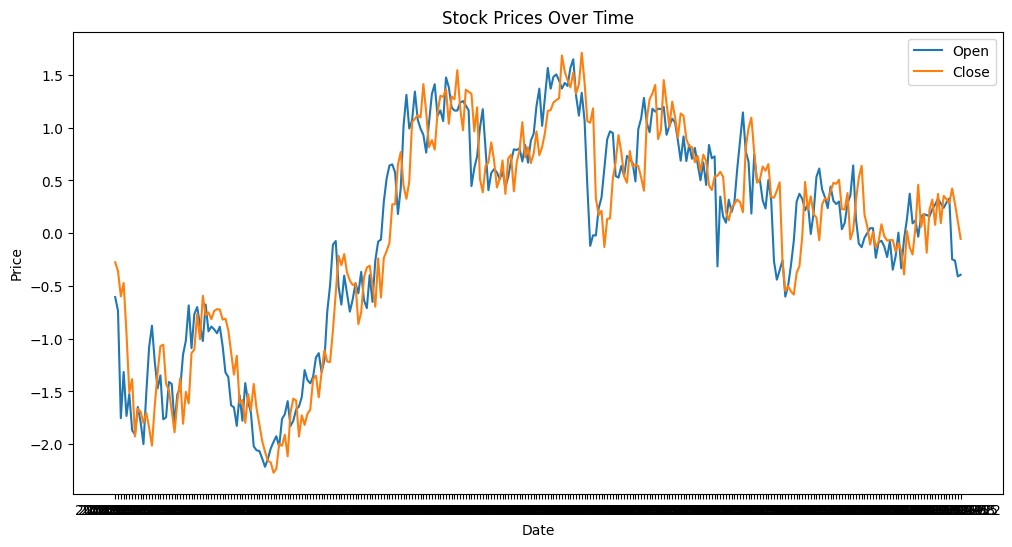

In [205]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Open'], label='Open')
plt.plot(df['Date'], df['Close'], label='Close')
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Now, to do an analysis using correlation matrix and a heat map, we need to make sure we have the correct features and using the standardised values for the same.

In [206]:
df_num = df.drop(["id" , "Date"],axis = 1)

In [207]:
correlation_matrix = df_num.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
              Open     Close    Volume  Strategy
Open      1.000000  0.927795 -0.461010  0.298590
Close     0.927795  1.000000 -0.458788  0.353171
Volume   -0.461010 -0.458788  1.000000 -0.132971
Strategy  0.298590  0.353171 -0.132971  1.000000


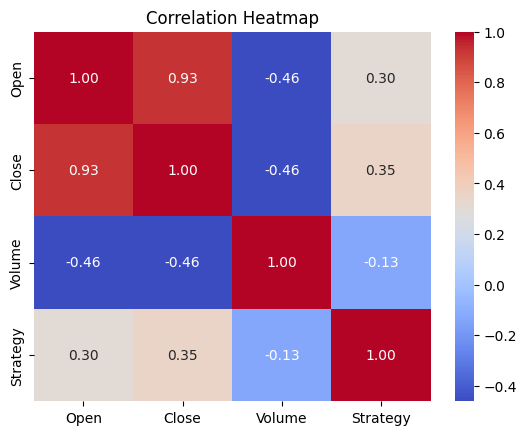

In [208]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Strategy is a column with encoded labels and this is classifiable data. So to get a good comparision I used strategy distribution plot which is essentially just a bar graph representing the counts of each label.

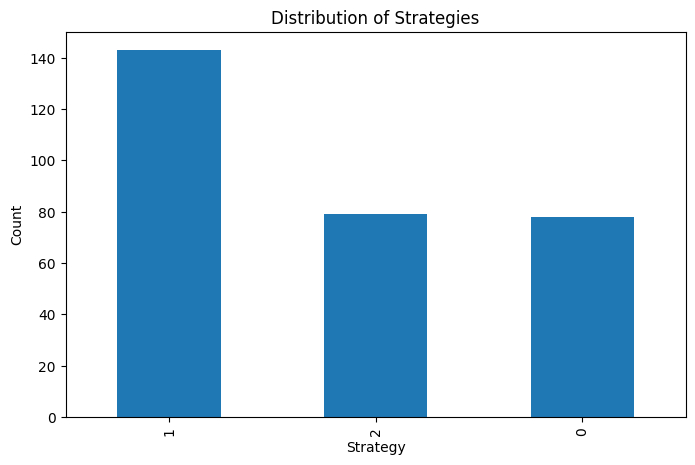

In [209]:
plt.figure(figsize=(8, 5))
df['Strategy'].value_counts().plot(kind='bar')
plt.title('Distribution of Strategies')
plt.xlabel('Strategy')
plt.ylabel('Count')
plt.show()

### Test Train Split

In [210]:
X_train, X_test, strategy_train, strategy_test, close_train, close_test = train_test_split(
    X, strategy_cols, close_cols, test_size=0.3, random_state=42
)

In [211]:
pd.DataFrame(X_train)

,id,Date,Open,Volume
194,194,20190218,95.286393,152515700
101,101,20170508,82.882052,266072400
68,68,20160919,53.519055,173135900
224,224,20190916,86.886132,118980100
37,37,20160215,61.679659,253044000
...,...,...,...,...
188,188,20190107,92.847220,183787600
71,71,20161010,56.970428,232554500
106,106,20170612,97.619622,175844000
270,270,20200803,74.594197,135904400


### Models Used

We have used 2 Models here:<br/>
<ul>
    <li>Strategy is just 3 different values and are string value labels, hence we have encoded them and used CLASSIFICATION.</li>
    <li>Close is a set of continuous values and for this, we use REGRESSION.</li>
</ul>

We used the RandomForestClassifier and RandomForestRegressor for the same

In [212]:
strategy_classifier = RandomForestClassifier(random_state=42)
strategy_classifier.fit(X_train, strategy_train)
strategy_pred = strategy_classifier.predict(X_test)

In [213]:
close_regressor = RandomForestRegressor(random_state=42)
close_regressor.fit(X_train, close_train)
close_pred = close_regressor.predict(X_test)

Inverse transforming labels to get back their string values.

In [214]:
strategy_pred_labels = Label_Encoder.inverse_transform(strategy_pred)

Initial accuracy score

In [215]:
strategy_accuracy = accuracy_score(strategy_test, strategy_pred)
strategy_accuracy

0.6444444444444445

The model accuracy is not great but we ensure that there is little to no chance of overfitting. This will significantly help us improve our position when the private leaderboard comes out.

MSE

In [216]:
close_rmse = np.sqrt(mean_squared_error(close_test, close_pred))
print(f'Close MSE: {close_rmse:.2f}')

Close MSE: 4.22


## Testing

<h3>Comments are self-explainatory for this first segment here</h3>

In [217]:
# Load the test data
test_data = pd.read_csv('test.csv')

# Convert 'Date' to numerical format
test_data['Date'] = pd.to_datetime(test_data['Date'])
test_data['Date'] = test_data['Date'].dt.year * 10000 + test_data['Date'].dt.month * 100 + test_data['Date'].dt.day

# Standardize features using the same scaler used for training data
X_test_data = scaler.fit_transform(test_data)

<h3>Checking</h3>

In [218]:
pd.DataFrame(X_test_data)

,0,1,2,3
0,-1.714816,-1.146446,0.272530,0.143479
1,-1.680173,-1.145189,0.339740,0.284158
2,-1.645531,-1.143931,0.038493,-0.788253
3,-1.610888,-1.142674,-0.001004,-0.060988
4,-1.576245,-1.141416,-0.223829,0.389571
...,...,...,...,...
95,1.576245,0.816124,-1.474171,0.471190
96,1.610888,2.410611,-1.081431,-0.369220
97,1.645531,2.411868,-0.983596,-0.275558
98,1.680173,2.413126,-1.652739,-0.601721


<h3>Making Predictions</h3>

In [219]:
# Predict 'Strategy' labels using the RandomForestClassifier
strategy_predictions = strategy_classifier.predict(X_test_data)

# Predict 'Close' prices using the RandomForestRegressor
close_predictions = close_regressor.predict(X_test_data)

c:\Users\l1972\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\l1972\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


<h3>Decoding and storing in csv</h3>

In [220]:
# Decode 'Strategy' labels back to original format
decoded_strategy_predictions = Label_Encoder.inverse_transform(strategy_predictions)

# Create a DataFrame for the sample submission format
submission_df = pd.DataFrame({
    'id': test_data['id'],
    'Date': test_data['Date'],
    'Close': close_predictions,
    'Strategy': decoded_strategy_predictions
})

# Save the predictions to a CSV file
submission_df.to_csv('sample_submission.csv', index=False)

submission_df['Date'] = pd.to_datetime(submission_df['Date'], format='%Y%m%d')

# Save the predictions to a CSV file with the original date format
submission_df.to_csv('sample_submission.csv', index=False)

We didn't Overcomplicate our model, we just used the data naturally in this draft. Like this one, we make 7 different iterations of RandomForest trying to get the best accuracy, but the problem were that the dataset is too small to get maximum accuracy using randomforest alone.<br/><br/> We tried using GridSearchCV and even XGBoost. Our public score did improve but public score does not tell anything about the amount of Overfitting. So, once the Private Scores were out, We came to a realization that the Accuracy was low due to size of Dataset but our model was giving very less overfitting as compared to many others.